In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [89]:
#Cargamos el archivo  ElectricCarData_Clean.csv y lo alajamos en un DataFrame:
df = pd.read_csv('b:/ElectricCarData_Clean.csv')

In [90]:
#Observamos el DataFrame df:
df.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


In [91]:
# Observamos la estrucutra del dataframe:
df.shape

(103, 14)

In [92]:
# Observalos el tipo de dato que se maneja en las columnas:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


#### **Descripción General del DataFrame**

**Este DataFrame** contiene información de **103 autos eléctricos**, incluyendo **marca y modelo**, además de distintas **características** que nos pueden ser útiles para que la empresa tenga en cuenta a la hora de **invertir** en una flota.

##### **Columnas**

1. **Brand**: Hace refencia a la marca del auto eléctrico.
2. **Model**: Hace referencia al modelo del auto eléctrico.
3. **AccelSec**: Indica el tiempo en segundos que tarda el vehículo en acelerar de 0 a 100 km/h.
4. **TopSpeed_KmH**: Velocidad máxima que puede alcanzar el vehículo en kilómetros por hora.
5. **Range_Km**: Autonomía máxima del vehículo en kilómetros con una carga completa.
6. **Efficiency_WhKm**: Consumo de energía del vehículo en vatios-hora por kilómetro, un indicador de eficiencia energética.
7. **FastCharge_KmH**: Número de kilómetros que el vehículo puede hacer en una hora de carga rápida.
8. **RapidCharge**: Indica si el vehículo es compatible con la carga rápida (Yes/No).
9. **PowerTrain**: Tipo de tracción del vehículo (e.g., AWD: All-Wheel Drive).
10. **PlugType**: Tipo de enchufe utilizado para cargar el vehículo (e.g., Type 2 CCS).
11. **BodyStyle**: Estilo de carrocería del vehículo (e.g., Sedan).
12. **Segment**: Segmento o categoría del vehículo según su tamaño y características (e.g., D).
13. **Seats**: Número de asientos disponibles en el vehículo.
14. **PriceEuro**: Precio estimado del vehículo en euros.

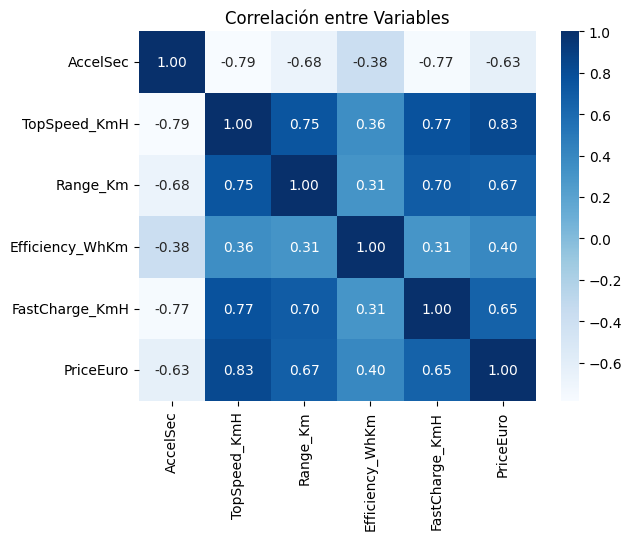

In [93]:
# Hacemos un mapa de calor para observar el nivel de correlación de las variables numericas:

# Convertimos a toda la columna en valores numericos para poder hacer la matriz de correlación:
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')

#Definimos la matriz de correlación:
matriz_correlación = df[['AccelSec','TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']].corr()

# Creamos el mapa de calor:
sns.heatmap(matriz_correlación, annot=True, cmap='Blues', fmt=".2f")

# Configuramos el título y lo mostramos:
plt.title('Correlación entre Variables')
plt.show()

Podemos observar diferentes correlaciones altas en relación al **precio** como por ejemplo aquellos autos con mayor **pico de velocidad** tienden a ser más **caros**, lo mismo en menor medida para la **autonomía total* y **autonomía de carga por hora**.

### Selección de variables a Analizar:

Ahora procedemos a analizar las variables que consideramos más importantes a la hora de tomar una decisión en que auto conviene más invertir y son las siguientes:

**Brand & Model**: La marca y el modelo son fundamentales para identificar los autos en cuales invertir además de que cada uno tiene su propia fama o reputación.

**RangeKmH**: Representa la autonomía total del auto con una carga completa, esto nos sirve ya que a mayor autonomía mayor cantidad de viajes se pueden realizar.

**Efficiency_WhKm**: La eficiencia watt-hora es importante a la hora de una inversión a largo plazo ya que las baterías con mejor eficiencia serán más duraderas.

**FastCharge_KmH**: Esta variable se desprende un poco de RangeKmH ya que habla de la autonomía por hora de carga, también nos interesa.

**RapidCharge**: Que sea del tipo carga rápida es fundamental para que la herramienta de trabajo dure más tiempo.

**PriceEuro**: El precio es de las variables más importantes a la hora de invertir ya que buscaremos una flota precio-calidad más balanceda maximizando el retorno de inversión.

### **Autonomía:**

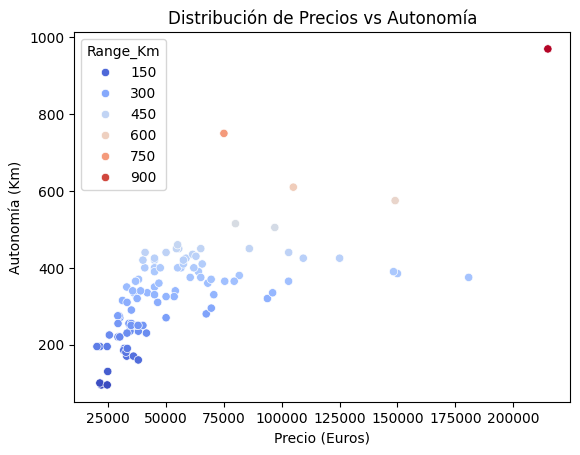

In [94]:
# Procedemos a hacer un gráfico de dispersión para ubicarnos más o menos entre el precio y autonomía:
sns.scatterplot(data=df, x='PriceEuro', y='Range_Km', hue='Range_Km', palette='coolwarm')

# Configuramos los títulos y mostramos:
plt.title('Distribución de Precios vs Autonomía')
plt.xlabel('Precio (Euros)')
plt.ylabel('Autonomía (Km)')
plt.show()

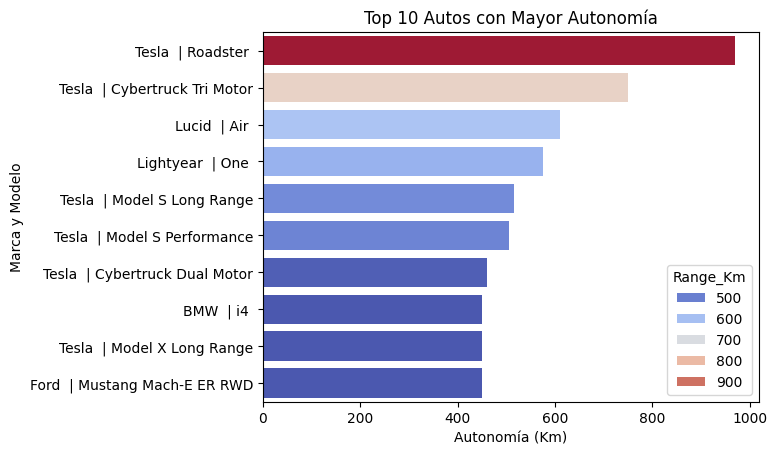

In [95]:
# Procedemos a mostrar los 10 mejores autos en relación a la autonomía

# Juntamos marca y modelo a mostrar:
df['Brand_Model'] = df['Brand'] + " | " + df['Model']

# Definimos el top 10:
top_autonomy = df[['Brand_Model', 'Range_Km']].sort_values(by='Range_Km', ascending=False).head(10)

# Creamos el gráfico de barras:
sns.barplot(data=top_autonomy, x='Range_Km', y='Brand_Model', hue='Range_Km', palette='coolwarm')

# Configuramos los títulos:
plt.title('Top 10 Autos con Mayor Autonomía')
plt.xlabel('Autonomía (Km)')
plt.ylabel('Marca y Modelo')
plt.show()



Más de la mitad del top 10 en autonomía son marca Tesla, si bien se ubican entre los mejores también se ubican dentro de los autos con mayor precio.

### Precios

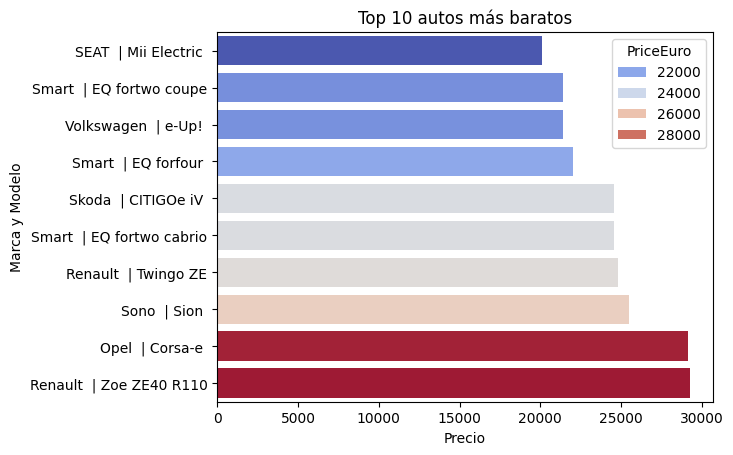

In [96]:
# Definimos el top 10 más baratos y el top 10 autos más caros 

# Juntamos marca y modelo a mostrar:
df['Brand_Model'] = df['Brand'] + " | " + df['Model']

# Definimos el top 10 autos más baratos:
top_autonomy = df[['Brand_Model', 'PriceEuro']].sort_values(by='PriceEuro', ascending=True).head(10)

# Hacemos el gráfico de barras:
sns.barplot(data=top_autonomy, x='PriceEuro', y='Brand_Model', hue='PriceEuro', palette='coolwarm')

# Configuramos los títulos y mostramos:
plt.title('Top 10 autos más baratos')
plt.xlabel('Precio')
plt.ylabel('Marca y Modelo')
plt.show()

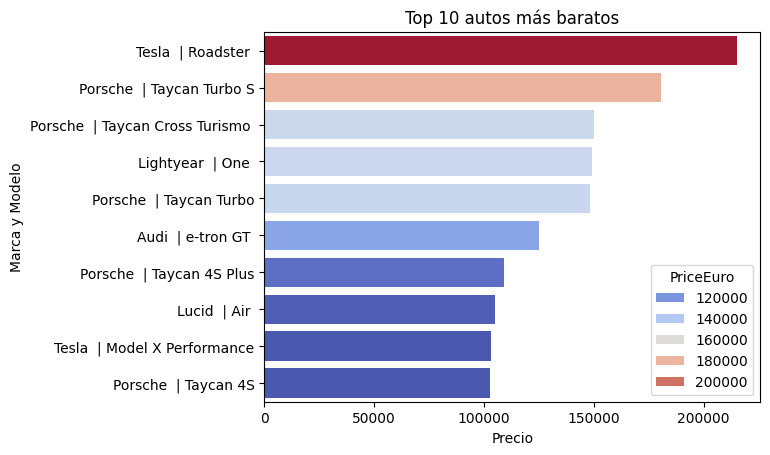

In [97]:
# Definimos el top 10 más baratos y el top 10 autos más caros 

# Juntamos marca y modelo a mostrar:
df['Brand_Model'] = df['Brand'] + " | " + df['Model']

# Definimos el top 10 autos más caros:
top_autonomy = df[['Brand_Model', 'PriceEuro']].sort_values(by='PriceEuro', ascending=False).head(10)

# Hacemos el gráfico de barras:
sns.barplot(data=top_autonomy, x='PriceEuro', y='Brand_Model', hue='PriceEuro', palette='coolwarm')

# Configuramos los títulos y mostramos:
plt.title('Top 10 autos más baratos')
plt.xlabel('Precio')
plt.ylabel('Marca y Modelo')
plt.show()

Eficiencia watt por hora:

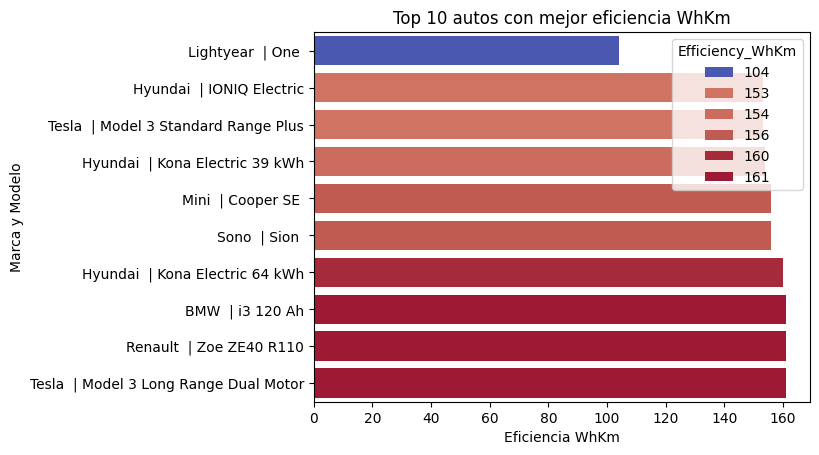

In [98]:
# Mostraremos los 10 autos con mayor eficiencia watt-hora

# Juntamos la marca y modelo para mostrar:
df['Brand_Model'] = df['Brand'] + " | " + df['Model']

# Definimos el top 10
top_autonomy = df[['Brand_Model', 'Efficiency_WhKm']].sort_values(by='Efficiency_WhKm', ascending=True).head(10)

# Creamos el gráfico de barras:
sns.barplot(data=top_autonomy, x='Efficiency_WhKm', y='Brand_Model', hue='Efficiency_WhKm', palette='coolwarm')

# Configuramos los títulos y mostramos:
plt.title('Top 10 autos con mejor eficiencia WhKm')
plt.xlabel('Eficiencia WhKm')
plt.ylabel('Marca y Modelo')
plt.show()


Autonomía por hora de carga

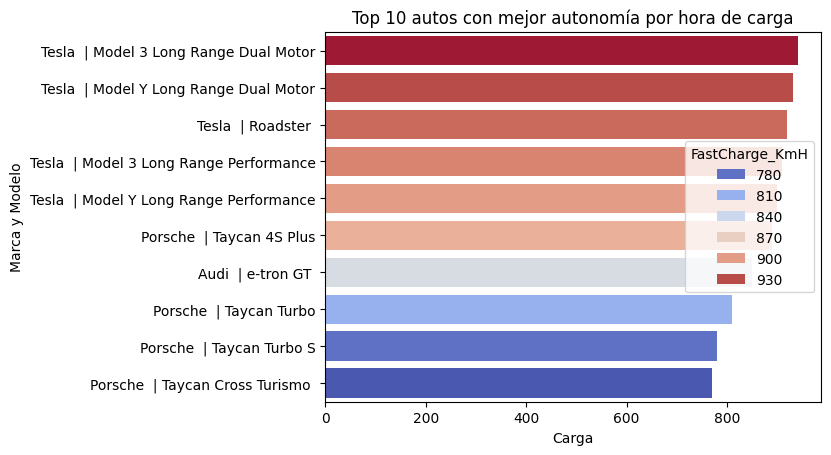

In [99]:
# Mostraremos los 10 autos con mayor autonomía por hora de carga:

# Juntamos la marca y modelo para mostrar:
df['Brand_Model'] = df['Brand'] + " | " + df['Model']

# Definimos el top 10
top_autonomy = df[['Brand_Model', 'FastCharge_KmH']].sort_values(by='FastCharge_KmH', ascending=False).head(10)

# Creamos el gráfico de barras:
sns.barplot(data=top_autonomy, x='FastCharge_KmH', y='Brand_Model', hue='FastCharge_KmH', palette='coolwarm')


# Configuramos los títulos y mostramos:
plt.title('Top 10 autos con mejor autonomía por hora de carga')
plt.xlabel('Carga')
plt.ylabel('Marca y Modelo')
plt.show()

**Carga Rápida**

In [100]:
# Filtramos los autos que no tienen carga rápida
autos_sin_carga_rapida = df[df['RapidCharge'] != 'Yes']

# Mostramos los autos sin carga rápida:
autos_sin_carga_rapida = autos_sin_carga_rapida[['Brand', 'Model', 'PriceEuro', 'Range_Km', 'Efficiency_WhKm']]
print(autos_sin_carga_rapida)

       Brand              Model  PriceEuro  Range_Km  Efficiency_WhKm
57  Renault           Twingo ZE      24790       130              164
68  Renault   Kangoo Maxi ZE 33      38000       160              194
77    Smart         EQ forfour       22030        95              176
82    Smart     EQ fortwo coupe      21387       100              167
91    Smart    EQ fortwo cabrio      24565        95              176


No es una cantidad suficiente como para tener en cuenta en el analisis, son autos baratos sin no muy buenas carácteristicas

Una vez analizado el top 10 de las variables más relevantes, procederemos a identificar los autos que ofrecen la mejor relación calidad-precio, basándonos en las variables clave previamente analizadas.

Obtendremos el promedio de cada una de dichas variables y buscaremos los autos que se encuentren a la vez, por debajo o por arriba dependiendo nos convenga:


In [101]:
# Definimos el promedio de las variables que nos interesan:
precio_promedio = df['PriceEuro'].mean()
autonomia_promedio = df['Range_Km'].mean()
eficiencia_promedio = df['Efficiency_WhKm'].mean()
carga_rapida_promedio = df['FastCharge_KmH'].mean()

#Imprimimos el promedio de las variables:
print(f"Precio promedio: {precio_promedio:.2f} Euros")
print(f"Autonomía promedio: {autonomia_promedio:.2f} Km")
print(f"Eficiencia energética promedio: {eficiencia_promedio:.2f} Wh/Km")
print(f"Carga rápida promedio: {carga_rapida_promedio:.2f} Km/h")

Precio promedio: 55811.56 Euros
Autonomía promedio: 338.79 Km
Eficiencia energética promedio: 189.17 Wh/Km
Carga rápida promedio: 456.73 Km/h


In [102]:
# # Filtramos autos con buen precio, autonomía, eficiencia y carga rápida superior al promedio.
calidad_precio = df[
    (df['PriceEuro'] < precio_promedio) & 
    (df['Range_Km'] > autonomia_promedio) & 
    (df['Efficiency_WhKm'] < eficiencia_promedio) &
    (df['FastCharge_KmH'] > carga_rapida_promedio)  
]

# Seleccionamos las columnas relevantes para analizar la relación calidad-precio:
calidad_precio = calidad_precio[['Brand', 'Model', 'PriceEuro', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']]

# Ordenamos los autos por precio en orden ascendente para identificar los más económicos:
calidad_precio = calidad_precio.sort_values(by='PriceEuro', ascending=True)

# Revisamos los autos con mejor relación calidad-precio:
print(calidad_precio.head(5))

          Brand                 Model  PriceEuro  Range_Km  Efficiency_WhKm  \
26  Volkswagen               ID.3 Pro      33000       350              166   
95  Volkswagen   ID.3 Pro Performance      35575       340              171   
80  Volkswagen               ID.3 1st      38987       340              171   
53       Skoda            Enyaq iV 80      40000       420              183   
15  Volkswagen             ID.3 Pro S      40936       440              175   

    FastCharge_KmH  
26           490.0  
95           470.0  
80           470.0  
53           560.0  
15           590.0  


### Conclusiones sobre la Inversión en Flota de Autos Eléctricos

Podemos concluir que una buena opción para realizar la inversión en la flota de autos eléctricos son los de la marca **Volkswagen**, especialmente la línea **ID.3** en sus versiones **1st**, **Pro**, **Pro Performance** y **Pro S**.

También entra dentro de los mejores autos eléctricos en relación **precio-calidad** el **Skoda Enyaq iV 80**.

Además, si no tomamos en cuenta la variable **FastCharge_KmH**, podrían entrar en la lista los autos de la marca **Kia**.
